In [1]:
import os, sys
import numpy
import matplotlib.pyplot as plt
import seaborn as sns ;sns.set()

In [2]:
sys.path.append("/content/drive/MyDrive/GSOC-NMR-project/Work/Notebooks")
from auxillary_functions import *

In [3]:
data_path = "/content/drive/MyDrive/GSOC-NMR-project/Work/Data/2021-06-21_classify_datagen_all_funcs"
raw_data = load_data(path=data_path,as_df=False)

Finished loading data into numpy array. Took 19.02s


In [4]:
print(raw_data.shape)
offset = 150
shifted_data, center = get_window(raw_data,2/3,width=offset)
print("The Echo pulse occurs at timestep:",center)

(10500, 942)
The Echo pulse occurs at timestep: 628


In [5]:
# Rescaled data
rscl_data = shifted_data / np.max(shifted_data,axis=1,keepdims=True)

# Rescaled log data
normalize = lambda  x : (x-np.min(x, axis=1,keepdims=True))/(np.max(x,axis=1,keepdims=True)-np.min(x, axis=1,keepdims=True))
rscl_ldata = normalize(np.log(shifted_data))

In [29]:
params = load_params(data_path)


Finsihed loading parameters file


In [30]:
params.head()

,αx,αy,αz,ξ,p,Γ3,stencil_type,s,p,d,pulse90,pulse180
0,0.000140,0.000140,0.004113,2.038144,2.0,0.0,0.0,1.0,0.0,0.0,1.570796,3.141593
1,0.000288,0.000288,0.005442,1.698081,2.0,0.0,0.0,1.0,0.0,0.0,1.570796,3.141593
2,0.000948,0.000948,0.000869,2.757263,2.0,0.0,0.0,1.0,0.0,0.0,1.570796,3.141593
3,0.008380,0.008380,0.014527,1.236614,2.0,0.0,0.0,1.0,0.0,0.0,1.570796,3.141593
4,0.000710,0.000710,0.013350,1.144264,2.0,0.0,0.0,1.0,0.0,0.0,1.570796,3.141593


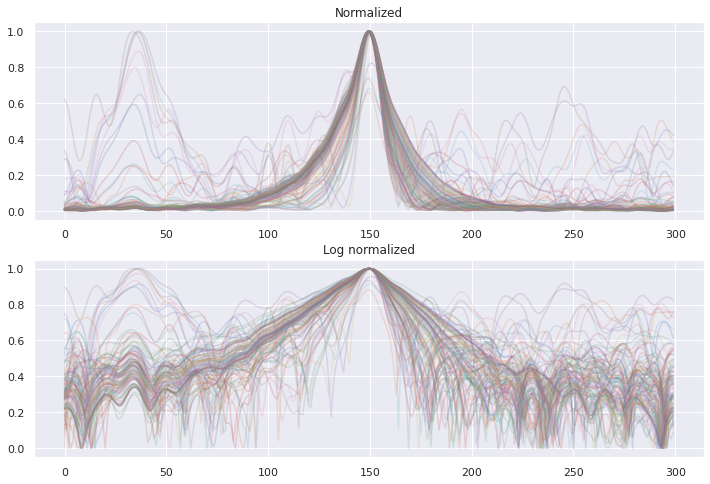

In [6]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.title("Normalized")
for j in range(0,10500,100):
    plt.plot(rscl_data[j,:],alpha=0.2)

plt.subplot(2,1,2)
plt.title("Log normalized")
for j in range(0,10500,100):
    plt.plot(rscl_ldata[j,:],alpha=0.2)

plt.show()

# Clustering with tslearn

In [7]:
! pip install tslearn

     |████████████████████████████████| 798kB 4.3MB/s 


In [8]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn import metrics
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

/usr/local/lib/python3.7/dist-packages/tslearn/clustering/kmeans.py:17: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  "Scikit-learn <0.24 will be deprecated in a "


## DBA KMeans

In [9]:
X_train = TimeSeriesScalerMeanVariance().fit_transform(rscl_data)

In [22]:
trainingdata = X_train[::10]

In [23]:
dba_km = TimeSeriesKMeans(n_clusters=3,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          n_jobs = 10,
                          max_iter_barycenter=10,
                          random_state=101)

In [24]:
y_pred = dba_km.fit_predict(trainingdata)

Init 1


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 1050 out of 1050 | elapsed:    3.5s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.1s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.9s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    8.0s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.4s finished
[Para

3.116 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.0s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.7s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.8s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.1s finished


1.696 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    3.9s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.7s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.8s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.1s finished


1.651 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    3.9s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.7s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.8s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.1s finished


1.634 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    3.9s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.6s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.7s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.0s finished


1.625 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    3.9s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.7s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.8s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.1s finished


1.618 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.0s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.7s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.7s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.0s finished


1.614 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    3.9s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.7s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.8s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.1s finished


1.612 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.0s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.8s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.9s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.2s finished


1.611 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    3.9s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.6s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.7s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.0s finished


1.610 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    3.9s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.6s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.7s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:    9.9s finished


1.610 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.0s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.8s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.9s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.1s finished


1.609 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.0s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.8s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.8s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.1s finished


1.609 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    3.9s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.6s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.7s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.0s finished


1.609 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    3.9s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.6s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.7s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:    9.9s finished


1.609 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    3.9s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.7s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.8s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.0s finished


1.609 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    3.9s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.6s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.6s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:    9.8s finished


1.609 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    3.9s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.7s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.7s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.0s finished


1.609 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.0s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.8s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.9s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.1s finished


1.609 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    3.9s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.7s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.9s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.2s finished


1.609 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    3.9s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.6s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.7s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.0s finished


1.609 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.1s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.9s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    8.0s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.3s finished


1.609 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.0s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.7s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.9s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.2s finished


1.609 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    3.9s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.6s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.7s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.0s finished


1.609 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.0s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.8s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.8s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.1s finished


1.609 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.0s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.8s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.9s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.1s finished


1.609 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.1s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.8s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.9s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.2s finished


1.609 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    3.9s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.6s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.7s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.0s finished


1.609 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    3.9s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.6s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.7s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.0s finished


1.609 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.0s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.8s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.9s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.2s finished


1.609 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    3.9s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.6s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.6s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:    9.9s finished


1.609 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.0s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.7s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.8s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.0s finished


1.609 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.0s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.8s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.8s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.1s finished


1.609 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    3.9s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.7s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.7s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.0s finished


1.609 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.4s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    3.9s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.6s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.6s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:    9.9s finished


1.609 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.0s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.7s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.9s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.1s finished


1.609 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    3.9s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.6s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.7s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:    9.9s finished


1.609 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    3.9s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.7s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.8s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.2s finished


1.609 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.0s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.8s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.8s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.2s finished


1.608 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.1s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.8s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    8.0s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.3s finished


1.608 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.1s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.9s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    8.0s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.4s finished


1.608 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.5s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.1s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.9s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    8.1s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.5s finished


1.608 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.0s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.8s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    8.0s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.3s finished


1.608 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.0s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.8s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.9s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.2s finished


1.608 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.0s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.8s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.9s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.2s finished


1.608 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.5s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.1s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.9s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    8.0s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.3s finished


1.608 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.1s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    6.0s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    8.2s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.5s finished


1.608 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.5s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.1s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.9s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    8.0s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.4s finished


1.608 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.5s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.1s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.9s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    8.1s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.4s finished


1.608 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.5s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.2s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    6.0s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    8.2s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.6s finished


1.608 --> 
Init 2


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 1050 out of 1050 | elapsed:    3.5s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.5s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.1s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.9s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    8.1s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.5s finished
[Para

3.792 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.0s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.7s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.8s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.1s finished


1.965 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.5s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.1s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.9s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    8.0s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.4s finished


1.940 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.0s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.7s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.8s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.2s finished


1.908 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.0s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.7s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.8s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.0s finished


1.907 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    3.9s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.7s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.8s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.1s finished


1.907 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.0s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.8s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.8s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.1s finished


1.907 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.0s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.8s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.9s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.2s finished


1.907 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.5s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.1s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.9s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    8.1s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.4s finished


1.906 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.1s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.9s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    8.0s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.4s finished


1.906 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.5s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.1s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.9s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    8.0s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.3s finished


1.906 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.0s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.7s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.8s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.1s finished


1.906 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.0s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.8s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.9s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.2s finished


1.906 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.0s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.7s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.8s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.1s finished


1.906 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.0s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.7s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.8s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.1s finished


1.906 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.0s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.7s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.9s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.2s finished


1.906 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.7s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.5s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.0s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.8s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.8s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.1s finished


1.906 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.0s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.8s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.9s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.3s finished


1.906 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    3.9s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.7s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.8s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.1s finished


1.906 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.0s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.7s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.8s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.0s finished


1.906 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.0s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.8s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.9s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.3s finished


1.906 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.0s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.8s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.8s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.1s finished


1.906 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.5s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.0s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.8s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.8s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.1s finished


1.906 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.5s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.0s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.8s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    8.0s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.2s finished


1.906 --> 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    3.9s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.7s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.7s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:    9.9s finished


1.906 --> 


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    4.0s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.8s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:    7.9s
[Parallel(n_jobs=10)]: Done 3150 out of 3150 | elapsed:   10.1s finished


In [27]:
y_pred

array([2, 0, 2, ..., 2, 2, 0])

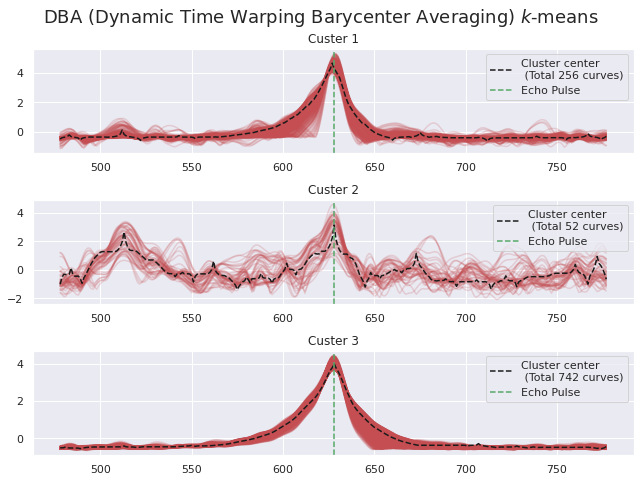

In [28]:
fig,axes = plt.subplots(3,1,figsize=(9,7))
ncurves = [len(trainingdata[y_pred == i]) for i in range(3)]

for yi in range(3):
    for timeseries in trainingdata[y_pred == yi]:
        axes[yi].plot(range(center-offset,center+offset),
                      timeseries.ravel(), "r-", alpha=0.2)
    axes[yi].plot(range(center-offset,center+offset),
                  dba_km.cluster_centers_[yi].ravel(), "k--",
                  label=f'Cluster center \n (Total {ncurves[yi]} curves)')
    

for idx,ax in np.ndenumerate(axes):
    ax.set_title(f"Custer {idx[0] +1}",fontsize=12)
    ax.axvline(x=center,color='g',ls='--',label='Echo Pulse')
    ax.legend()

plt.suptitle("DBA (Dynamic Time Warping Barycenter Averaging) $k$-means",fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [35]:
print(params['stencil_type'].values[::10])

[0. 0. 0. ... 2. 2. 2.]
